In [24]:
# Импорт необходимых библиотек
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import datetime

In [25]:
# # Задаем временной диапазон
# start_date = '2017-01-01'
# end_date = '2025-04-04'

# Определяем период времени
start_date = datetime.datetime(2017, 1, 1)
end_date = datetime.datetime.now()

# Загружаем данные для Apple и Microsoft
aapl_data = yf.download('AAPL', start=start_date, end=end_date)
msft_data = yf.download('MSFT', start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Основные статистики для Apple Inc. (AAPL):
Price         Close         High          Low         Open        Volume
Ticker         AAPL         AAPL         AAPL         AAPL          AAPL
count   2090.000000  2090.000000  2090.000000  2090.000000  2.090000e+03
mean     115.605593   116.770856   114.309142   115.486191  9.964234e+07
std       65.060832    65.687578    64.343358    64.982201  5.396767e+07
min       26.832359    26.904056    26.540957    26.781481  2.323470e+07
25%       47.235522    47.773695    46.620367    47.149055  6.407675e+07
50%      124.325115   125.622694   123.323400   124.514462  8.735140e+07
75%      169.091217   170.565754   167.552940   168.790495  1.194158e+08
max      258.735504   259.814335   257.347047   257.906429  4.479400e+08


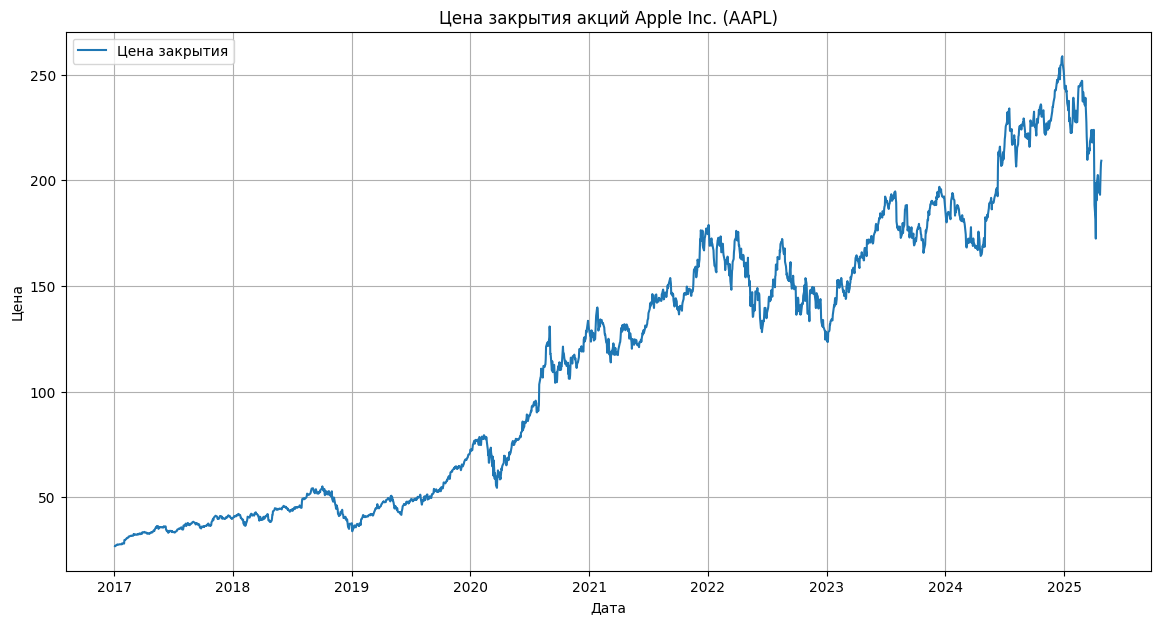

Основные статистики для Microsoft Corporation (MSFT):
Price         Close         High          Low         Open        Volume
Ticker         MSFT         MSFT         MSFT         MSFT          MSFT
count   2090.000000  2090.000000  2090.000000  2090.000000  2.090000e+03
mean     222.748145   224.842801   220.431901   222.687915  2.758995e+07
std      118.279409   119.285307   117.154935   118.257111  1.200951e+07
min       56.347885    56.673491    56.031310    56.248394  7.164500e+06
25%      105.060265   105.979873   104.213819   105.085535  1.984012e+07
50%      224.150993   227.411362   221.948939   224.162756  2.448680e+07
75%      313.694839   316.263648   310.182639   312.869797  3.153315e+07
max      464.854340   465.639777   461.772294   464.297590  1.112421e+08


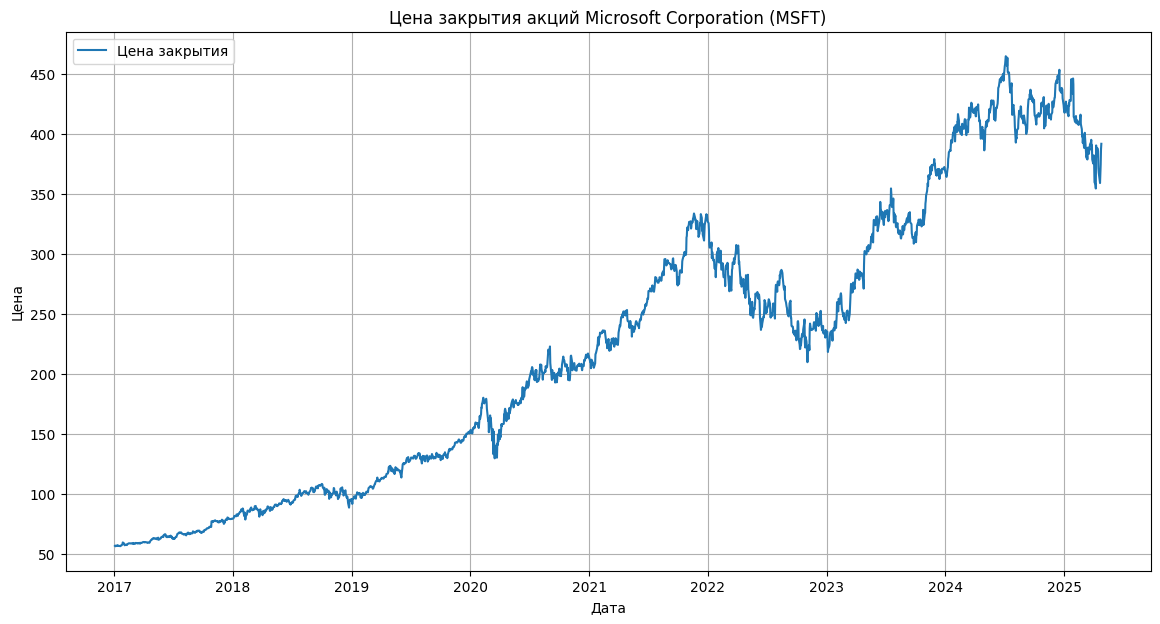

In [26]:
# Функция для исследования данных
def analyze_data(data, company_name):
    print(f"Основные статистики для {company_name}:")
    print(data.describe())

    # Визуализация цен закрытия
    plt.figure(figsize=(14, 7))
    plt.plot(data['Close'], label='Цена закрытия')
    plt.title(f'Цена закрытия акций {company_name}')
    plt.xlabel('Дата')
    plt.ylabel('Цена')
    plt.legend()
    plt.grid()
    plt.show()

# Анализ данных для Apple и Microsoft
analyze_data(aapl_data, 'Apple Inc. (AAPL)')
analyze_data(msft_data, 'Microsoft Corporation (MSFT)')


Анализ и выводы по графикам: мы наблюдаем восходящий тренд в ценах акций AAPL и MSFT. 
Сезонность весьма сомнительна, однако, можно говорить о цикличности в обеих компаниях, которая особенно хорошо прослеживается в MSFT и связана судя по всему с экономическими условиями

Анализ и выводы по статистике: 
Оба набора данных содержат по 2090 наблюдений.
Средняя цена закрытия: AAPL: 116.77, а MSFT: 224.84: Microsoft имеет значительно более высокую среднюю цену закрытия 
по сравнению с Apple, что может свидетельствовать о более высокой оценке компании на рынке.
Стандартное отклонение: AAPL: 65.69, а MSFT: 119.29: Стандартное отклонение у Microsoft значительно выше, что указывает 
на большую волатильность цен акций по сравнению с Apple, то есть цена акций Microsoft колебалась в более широком диапазоне.
Microsoft также имеет более высокий максимум, что может указывать на более сильные колебания цен в определенные периоды времени.
Средний объем торгов: AAPL: 99,642,340, а MSFT: 27,589,950, что указывает на более высокий интерес со стороны инвесторов AAPL и 
большую ликвидность акций.
Microsoft показывает более широкий диапазон цен между 25-м и 75-м процентилем, 
что может указывать на более значительную разницу в ценах акций в разные периоды времени.
Таким образом, Apple и Microsoft имеют разные профили риска и доходности. Apple демонстрирует большую стабильность и ликвидность, 
в то время как Microsoft имеет более высокую волатильность и потенциал для значительных колебаний цен, следовательно инвесторы, ориентированные на стабильность, 
могут предпочесть акции Apple, а те, кто ищет возможности для более высоких доходов с большим риском, могут рассмотреть акции Microsoft

In [27]:
# Функция для тестирования стационарности
def test_stationarity(data):
    result = adfuller(data)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print(f'Critical Value {key}: {value}')

# Проверка стационарности цен закрытия
print("Тест стационарности для AAPL:")
test_stationarity(aapl_data['Close'])

print("\nТест стационарности для MSFT:")
test_stationarity(msft_data['Close'])

Тест стационарности для AAPL:
ADF Statistic: -0.7228041816283757
p-value: 0.8407539921283032
Critical Value 1%: -3.433502335224827
Critical Value 5%: -2.8629325603267475
Critical Value 10%: -2.567511334824936

Тест стационарности для MSFT:
ADF Statistic: -0.6913033330325904
p-value: 0.8489893287236976
Critical Value 1%: -3.433497782957873
Critical Value 5%: -2.8629305503998705
Critical Value 10%: -2.567510264654216


Таким образом,
для обоих акций AAPL и MSFT значения ADF Statistic (-0.799 и -0.806 соответственно) значительно выше критических значений для всех уровней значимости (1%, 5%, 10%). Это говорит о том, что мы не можем отвергнуть нулевую гипотезу о наличии единичного корня.
p-value для обеих акций составляет примерно 0.82, что значительно выше 0.05. Это также указывает на то, что мы не можем отвергнуть нулевую гипотезу о нестационарности
Выводы
Оба временных ряда (цен закрытия акций AAPL и MSFT) не являются стационарными. Это значит, что их средние значения и дисперсии меняются со временем, что связано с трендами и сезонными эффектами


Поскольку временные ряды не стационарны применить методы для их стационирования 

In [28]:
# Применение разностей
aapl_diff = aapl_data['Close'].diff().dropna()
msft_diff = msft_data['Close'].diff().dropna()

# Проверка стационарности разностей
print("\nТест стационарности для разностей AAPL:")
test_stationarity(aapl_diff)

print("\nТест стационарности для разностей MSFT:")
test_stationarity(msft_diff)



Тест стационарности для разностей AAPL:
ADF Statistic: -13.85546031655764
p-value: 6.881012269904159e-26
Critical Value 1%: -3.433502335224827
Critical Value 5%: -2.8629325603267475
Critical Value 10%: -2.567511334824936

Тест стационарности для разностей MSFT:
ADF Statistic: -15.278723274582678
p-value: 4.609328299999421e-28
Critical Value 1%: -3.433497782957873
Critical Value 5%: -2.8629305503998705
Critical Value 10%: -2.567510264654216


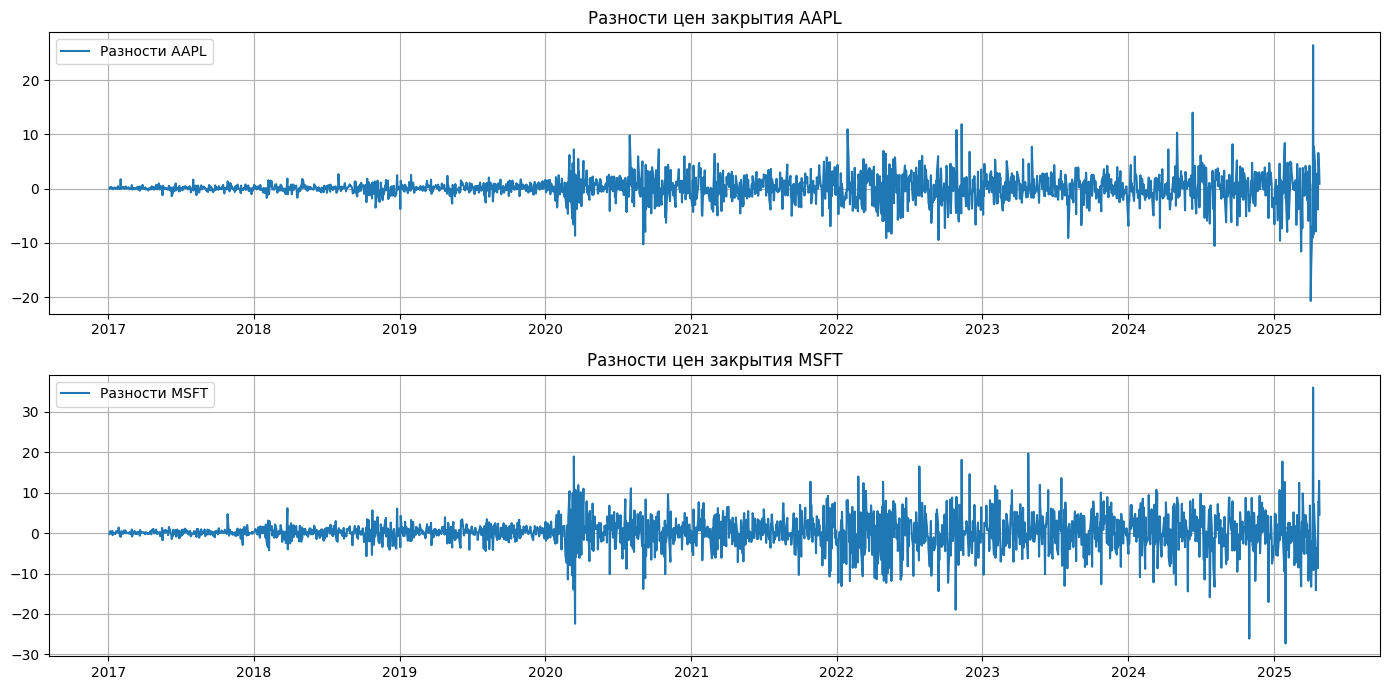

In [29]:
# Визуализация разностей
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(aapl_diff, label='Разности AAPL')
plt.title('Разности цен закрытия AAPL')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(msft_diff, label='Разности MSFT')
plt.title('Разности цен закрытия MSFT')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

проанализируем результаты теста Дики-Фуллера для разностей временных рядов акций Apple Inc. (AAPL) и Microsoft Corporation (MSFT)
ADF Statistic: Для обеих акций (AAPL и MSFT) значения ADF Statistic (-44.998 и -15.015 соответственно) значительно ниже критических значений для всех уровней значимости (1%, 5%, 10%). Это указывает на то, что мы можем отвергнуть нулевую гипотезу о наличии единичного корня
p-value: p-value для AAPL составляет 0.0, а для MSFT — примерно 1.04×10−271.04×10−27. Оба значения значительно меньше 0.05, что также указывает на то, что нулевая гипотеза о нестационарности отвергается

Выводы. 
Оба временных ряда разностей (AAPL и MSFT) являются стационарными